Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: >

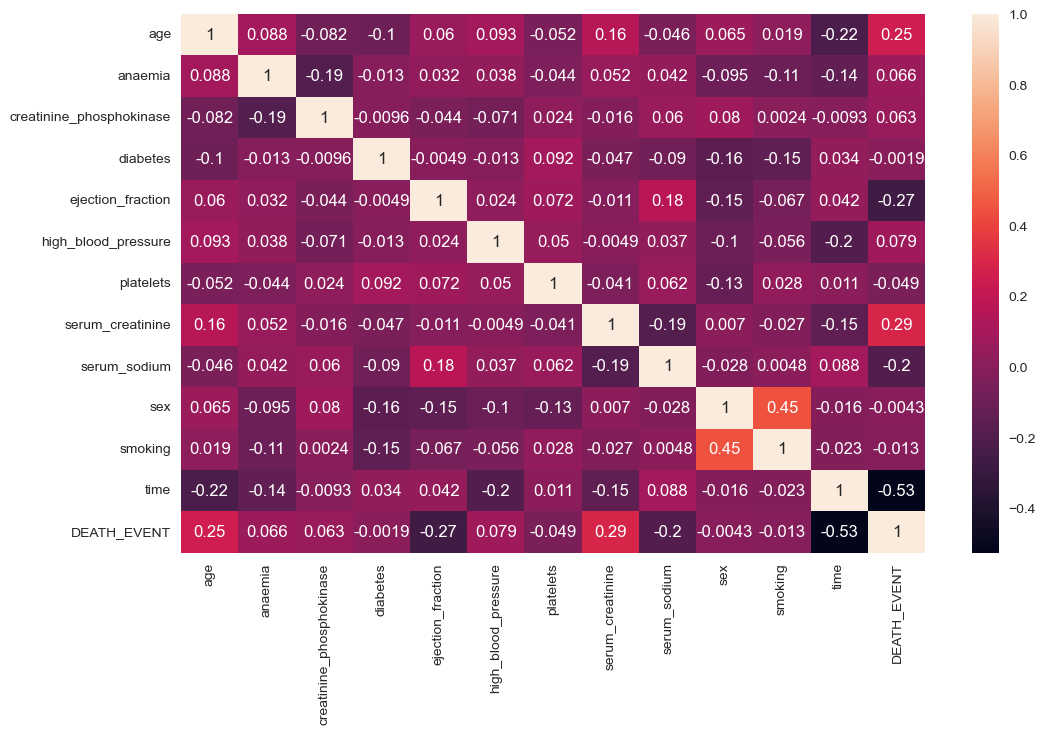

In [4]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True)

In [5]:
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
features = X.columns.tolist()

In [6]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=features)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


Elbow method

In [7]:
wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

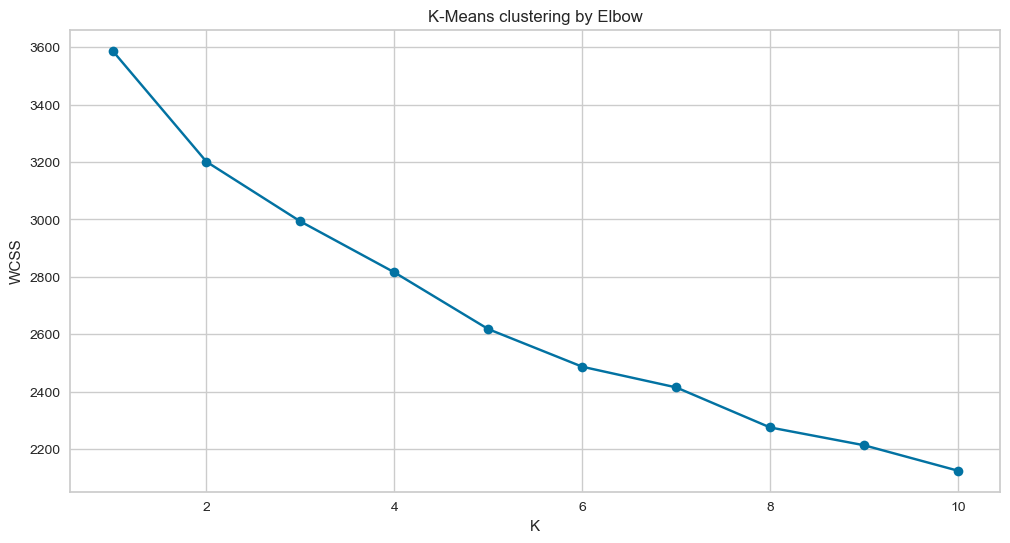

In [8]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, 'o-')
plt.title('K-Means clustering by Elbow')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [9]:
for i in range (1, len(wcss)):
    print(f'cluster {i} -> {wcss[i]}')

cluster 1 -> 3201.120628021606
cluster 2 -> 2993.07322612548
cluster 3 -> 2815.625878897172
cluster 4 -> 2617.8438711619174
cluster 5 -> 2486.8190578785307
cluster 6 -> 2414.7594121664015
cluster 7 -> 2275.1944146169562
cluster 8 -> 2213.1956648366754
cluster 9 -> 2124.418983898723


In [10]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, random_state=42)
y_pred = kmeans.fit_predict(X)

In [11]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [12]:
silhoutte_scores = []

for i in range (2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhoutte_scores.append(score)

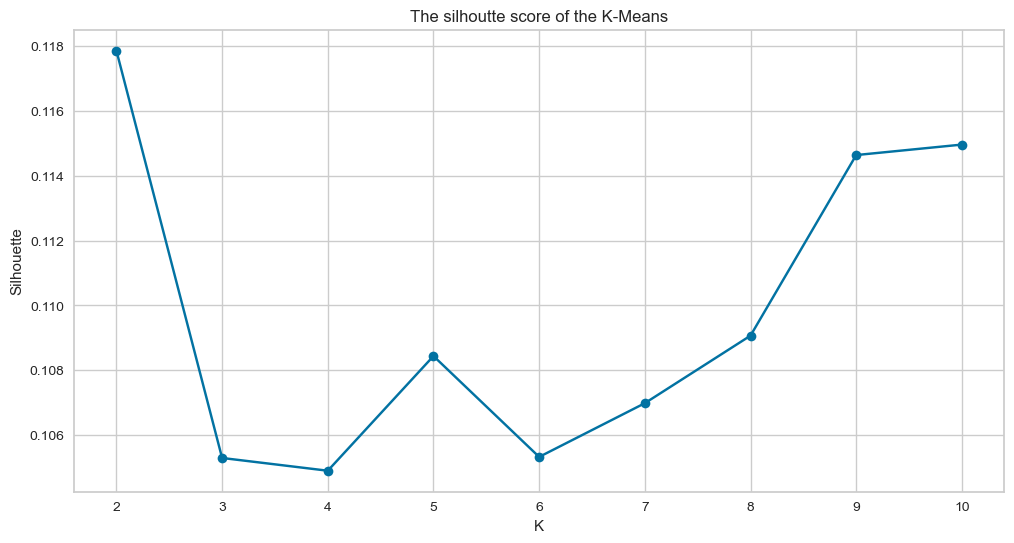

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhoutte_scores, 'o-')
plt.title('The silhoutte score of the K-Means')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

In [47]:
for i, score in enumerate(silhoutte_scores):
    print(f'Silhouette score for {i+2} clusters: {score}')

Silhouette score for 2 clusters: 0.1178512561512019
Silhouette score for 3 clusters: 0.10529706940384334
Silhouette score for 4 clusters: 0.10490398165321953
Silhouette score for 5 clusters: 0.10843949270372424
Silhouette score for 6 clusters: 0.10532952186895216
Silhouette score for 7 clusters: 0.10698571941078754
Silhouette score for 8 clusters: 0.10906803295335439
Silhouette score for 9 clusters: 0.11463484708178373
Silhouette score for 10 clusters: 0.11495763542120395


In [48]:
best_n_clusters = silhoutte_scores.index(max(silhoutte_scores)) + 2
print(f'Best number of clusters: {best_n_clusters}')

Best number of clusters: 2


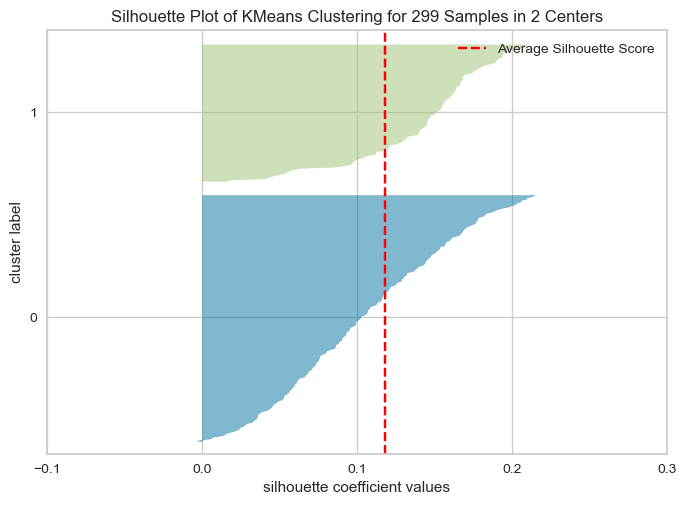

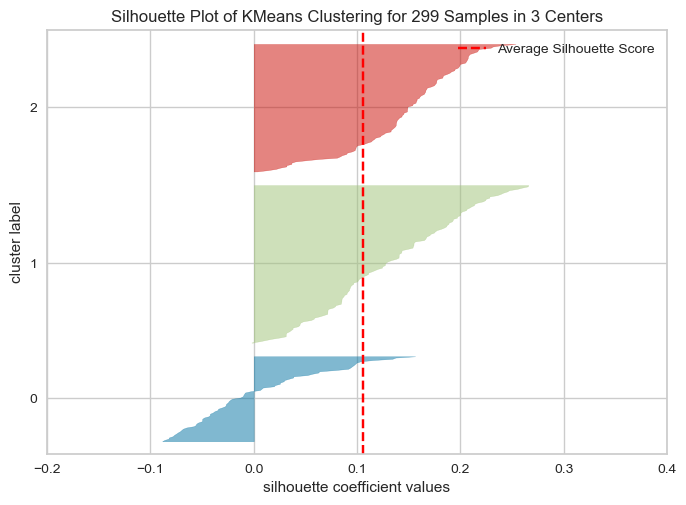

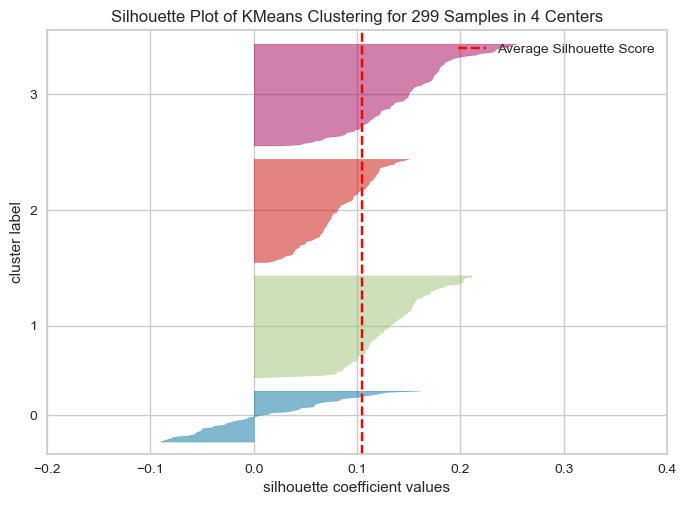

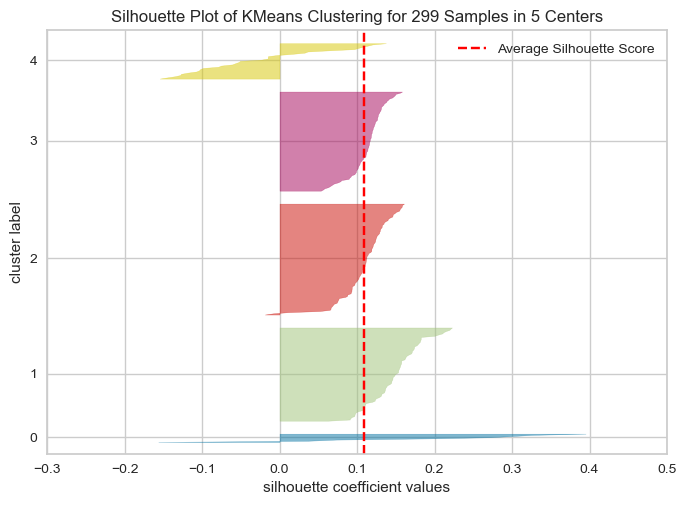

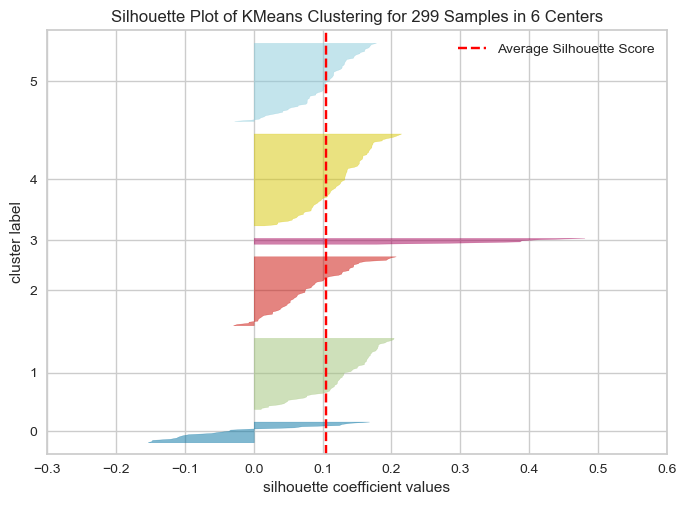

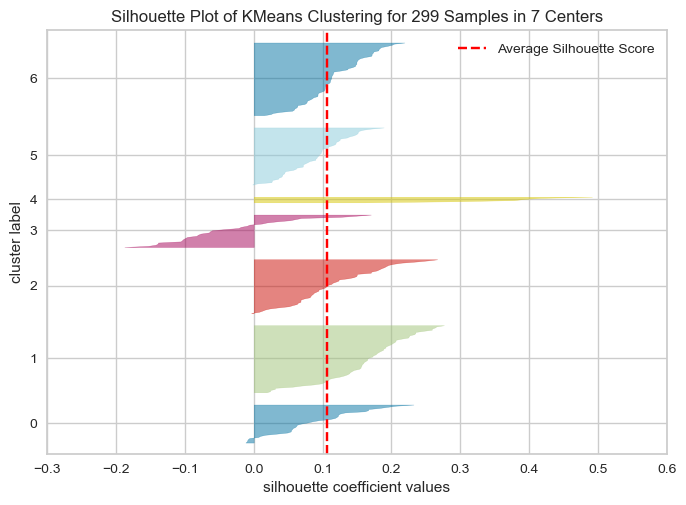

In [16]:
for i in range(2, len(silhoutte_scores) - 1):
    model = KMeans(n_clusters=i, random_state=42)
    visualizer =SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)
    visualizer.show()

Cluster terbaik berdasarkan silhoutte score: 2 cluster

menggunakan kolom age dan ejection fraction untuk mendapatkan klaster

In [17]:
ae = X.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'platelets'], axis=1)

In [18]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, random_state=42)
labels = kmeans.fit_predict(ae)

In [19]:
ae['target'] = labels

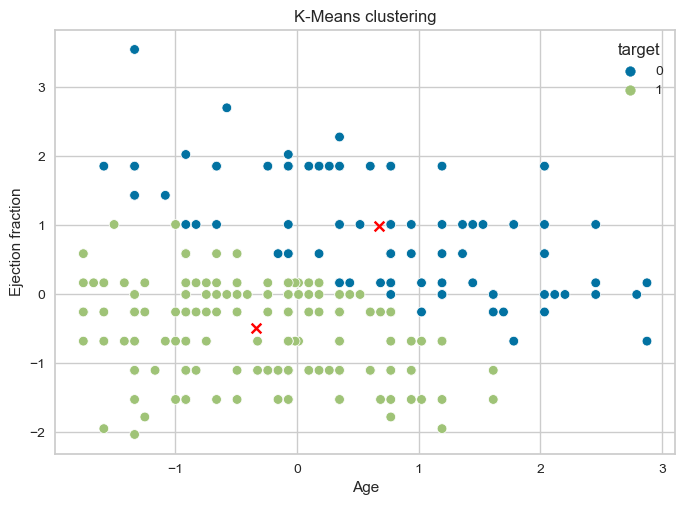

In [20]:
sns.scatterplot(data=ae, x='age', y='ejection_fraction', hue='target', legend=True)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red')
plt.title('K-Means clustering')
plt.xlabel('Age')
plt.ylabel('Ejection fraction')
plt.grid(True)
plt.show()

Menggunakan Hierarchical untuk mendapatkan jumlah cluster

In [21]:
ae2 = ae.copy()
ae2.drop('target', axis=1, inplace=True)

menggunakan algoritma linkage dengan method single, average, complete dan ward

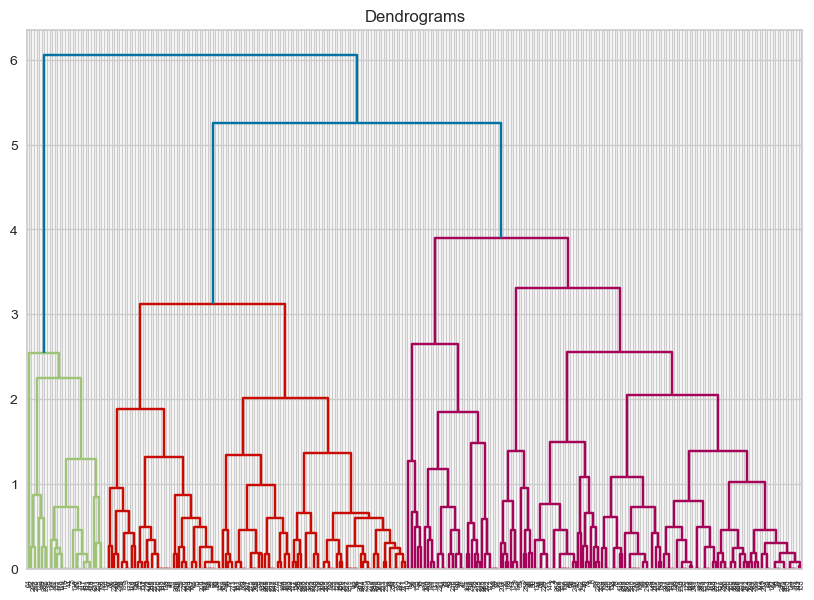

In [22]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(ae2, method='complete'))

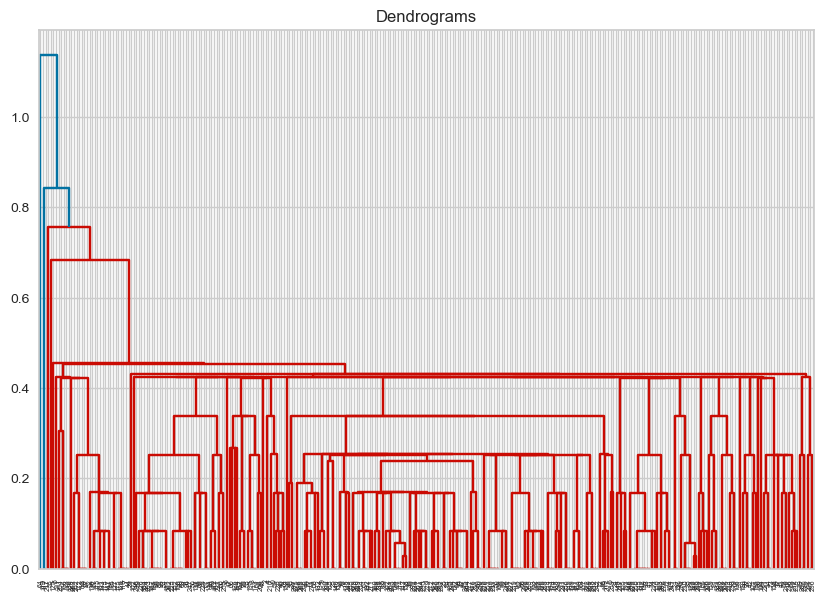

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(ae2, method='single'))

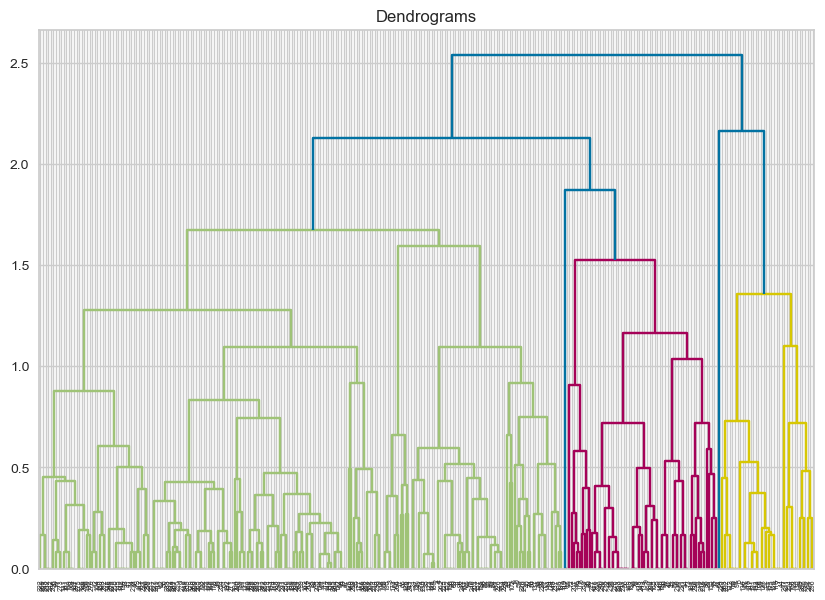

In [24]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(ae2, method='average'))

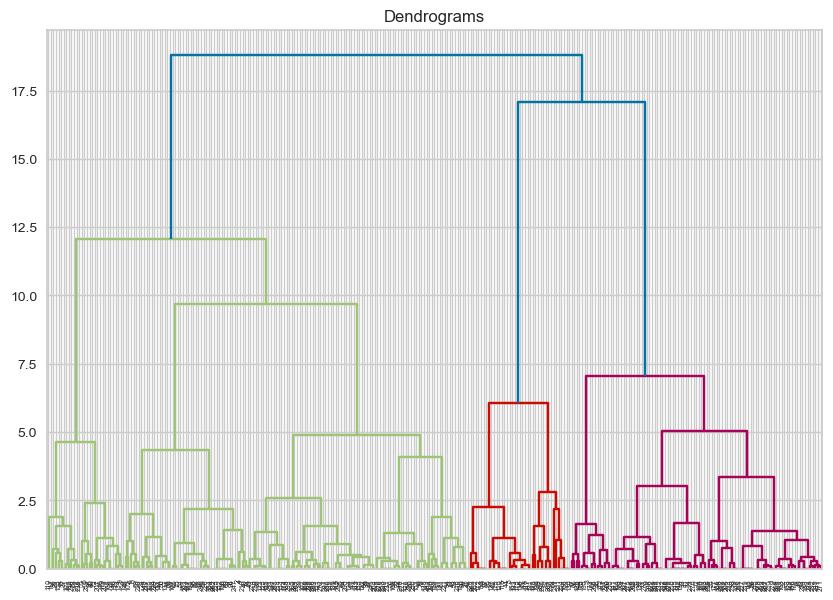

In [25]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(ae2, method='ward'))

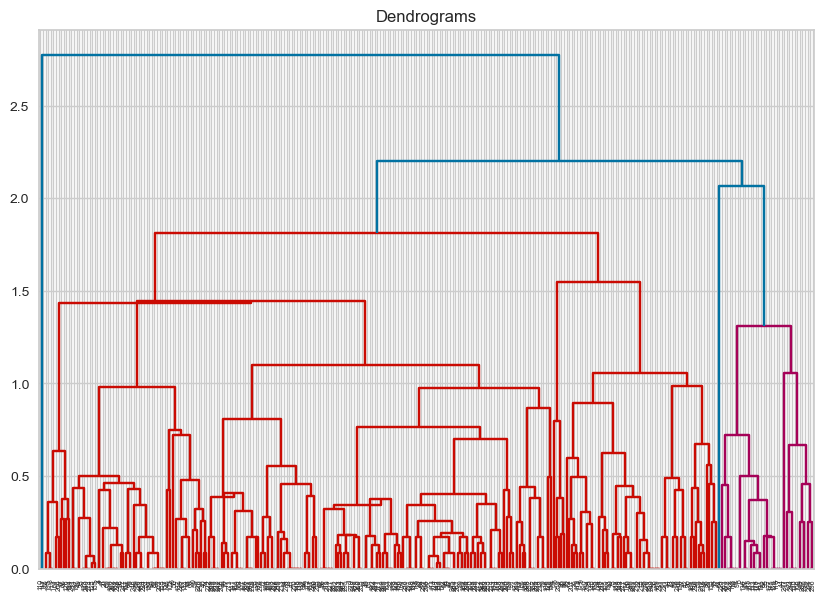

In [26]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(ae2, method='centroid'))

In [27]:
ag = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = ag.fit_predict(ae2)

In [28]:
labels

array([0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2,
       1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1], dtyp

In [29]:
ae2['target'] = labels
ae2

,age,ejection_fraction,target
0,1.192945,-1.530560,0
1,-0.491279,-0.007077,1
2,0.350833,-1.530560,0
3,-0.912335,-1.530560,1
4,0.350833,-1.530560,0
...,...,...,...
294,0.098199,-0.007077,0
295,-0.491279,-0.007077,1
296,-1.333392,1.854958,2
297,-1.333392,-0.007077,1


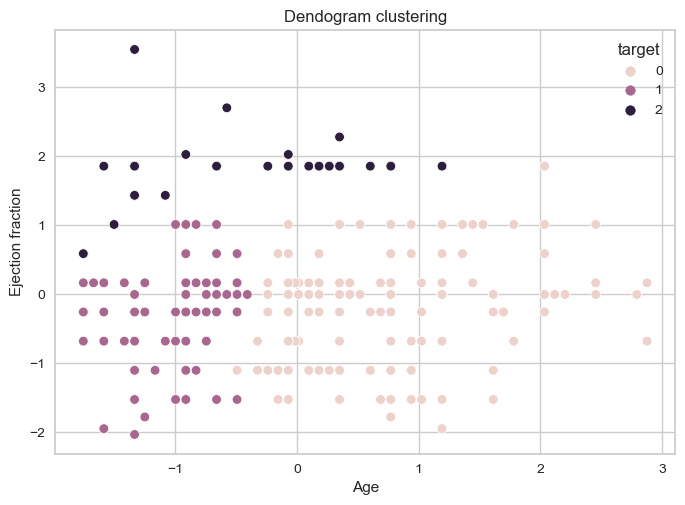

In [30]:
sns.scatterplot(data=ae2, x='age', y='ejection_fraction', hue='target', legend=True)
plt.title('Dendogram clustering')
plt.xlabel('Age')
plt.ylabel('Ejection fraction')
plt.grid(True)
plt.show()

DBscan

In [31]:
ae3 = X[['age', 'ejection_fraction', 'serum_creatinine']]

clustering = DBSCAN(eps=0.75, min_samples=2).fit(ae3)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3,  0,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0

In [32]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(ae3)
distances, indices = neighbors.kneighbors(ae3)

In [33]:
distances = np.sort(distances[:, 1], axis=0)

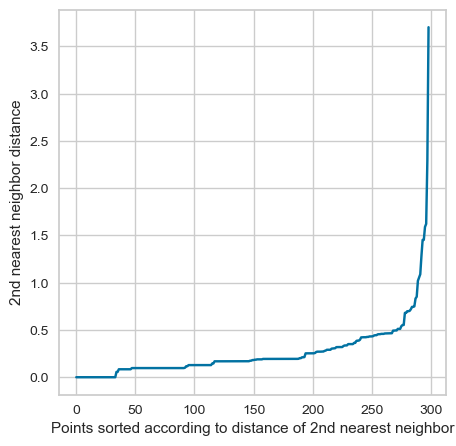

In [34]:
plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points sorted according to distance of 2nd nearest neighbor")
plt.ylabel("2nd nearest neighbor distance")
plt.show()

In [35]:
dbscan = DBSCAN(eps=0.4, min_samples=2)
dbscan.fit(ae3)

DBSCAN(eps=0.4, min_samples=2)

In [36]:
target = dbscan.labels_
target

array([ 0,  1,  2, -1, -1, -1, -1,  3, -1, -1, -1,  4,  5,  1,  5,  6,  7,
       -1,  4, -1,  4,  8,  1,  9, 10, 11, -1, 12, -1, -1, -1, -1,  1,  5,
        6, -1, -1,  6, -1, -1,  0,  5, 12,  6,  3,  1,  4,  1, -1, 13,  4,
       -1, -1,  6, -1, -1, -1,  1, 14,  2,  4, -1,  1,  1, -1, -1, -1,  4,
        4, 15,  1,  1,  7,  6,  2, -1,  3,  1,  1, 16, -1,  6, 17,  6,  4,
       18,  1,  3,  1,  4, 12, 16, 19, 17,  1,  3,  4,  3,  4,  1,  4, -1,
       -1,  5, -1, 10, 16,  1,  1,  1, -1,  1, -1,  3,  1,  1,  3, -1,  3,
       -1,  3,  1,  1, 13, -1, -1, -1,  3, 13, -1,  9, -1,  1,  3,  7,  1,
        3, 15,  1,  5,  7,  1,  5,  1, -1,  5,  5,  3, 10,  1, -1,  3, 16,
        1,  1, 17,  1,  4,  6, 16,  1,  1,  1,  1,  5,  7,  9, -1,  1,  1,
        1,  1,  3, 14,  1,  3,  1, 18,  3,  1,  5,  4,  4, -1,  4,  8, 18,
       17,  1, -1, 11,  3,  1, 20, -1, -1,  1, 13, 14,  1, 16, 19,  3, -1,
        1, 16,  1,  7,  1,  1,  2,  9,  6, 21,  1,  1,  6, -1,  1,  1,  0,
        6,  1,  4,  4, -1

In [37]:
ae3['target'] = target
ae3

,age,ejection_fraction,serum_creatinine,target
0,1.192945,-1.530560,0.490057,0
1,-0.491279,-0.007077,-0.284552,1
2,0.350833,-1.530560,-0.090900,2
3,-0.912335,-1.530560,0.490057,-1
4,0.350833,-1.530560,1.264666,-1
...,...,...,...,...
294,0.098199,-0.007077,-0.284552,1
295,-0.491279,-0.007077,-0.187726,1
296,-1.333392,1.854958,-0.575031,19
297,-1.333392,-0.007077,0.005926,1


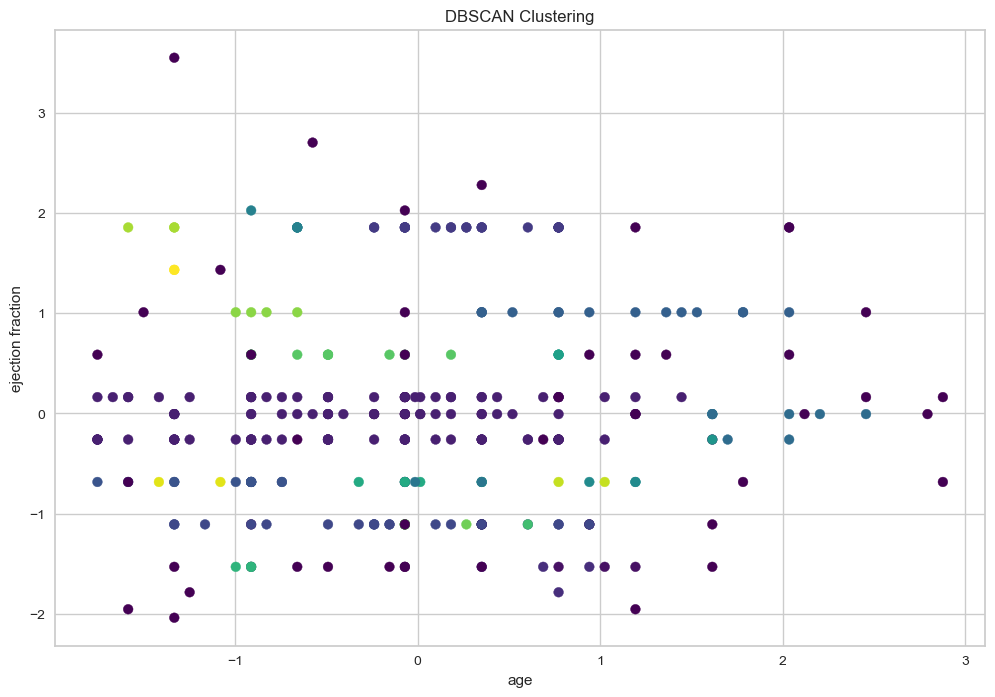

In [38]:
plt.figure(figsize=(12, 8))
plt.scatter(ae3['age'], ae3['ejection_fraction'], c=ae3['target'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('age')
plt.ylabel('ejection fraction')
plt.grid(True)
plt.show()

In [39]:
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(ae3)
    sse.append(kmeans.inertia_)

In [40]:
kn = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
knee_point = kn.knee
print(f'The knee point is at: {knee_point}')

The knee point is at: 3


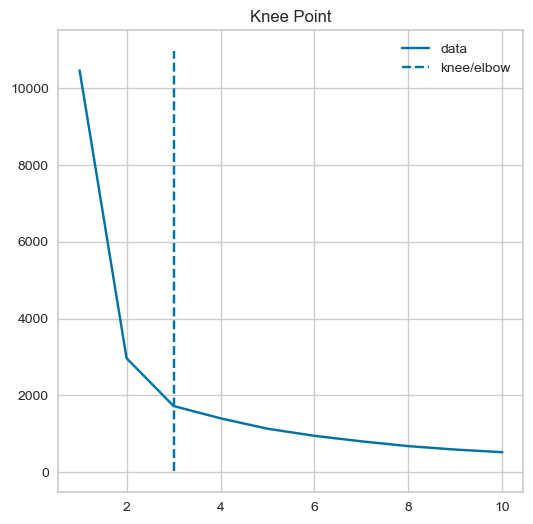

In [41]:
kn.plot_knee()

In [42]:
db = DBSCAN(eps=0.35, min_samples=2)
y_pred = db.fit_predict(ae3)

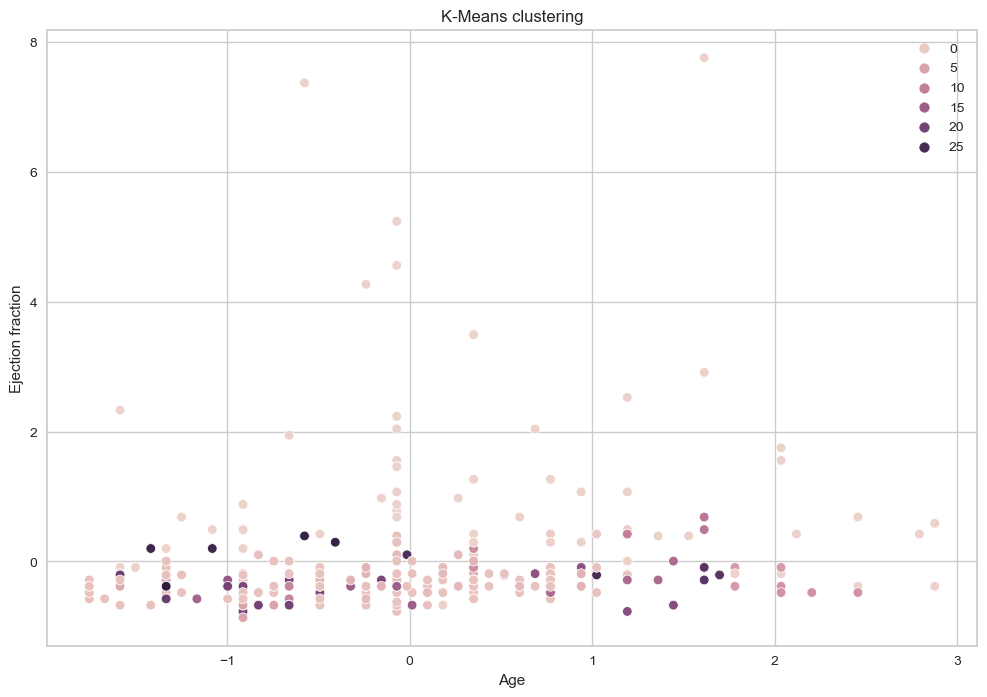

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ae3, x='age', y='serum_creatinine', hue=y_pred, legend=True)
plt.title('K-Means clustering')
plt.xlabel('Age')
plt.ylabel('Ejection fraction')
plt.grid(True)
plt.show()

In [44]:
ae3

,age,ejection_fraction,serum_creatinine,target
0,1.192945,-1.530560,0.490057,0
1,-0.491279,-0.007077,-0.284552,1
2,0.350833,-1.530560,-0.090900,2
3,-0.912335,-1.530560,0.490057,-1
4,0.350833,-1.530560,1.264666,-1
...,...,...,...,...
294,0.098199,-0.007077,-0.284552,1
295,-0.491279,-0.007077,-0.187726,1
296,-1.333392,1.854958,-0.575031,19
297,-1.333392,-0.007077,0.005926,1
